In [4]:
# --- compare low fert vs high fert
import os

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

outdir = "/home/tykukla/SCEPTER/results_synthesized"
fnlow = "lowfert_cc_0p0.csv"
fnhigh = "xhifert_cc_0p0.csv"

In [5]:
# --- read in
dflow = pd.read_csv(os.path.join(outdir, fnlow))
dfhi = pd.read_csv(os.path.join(outdir, fnhigh))

# cdvar stuff
var_fn = "flx_gas"  # ["flx_gas" or "flx_co2sp"]
# set cdr variable
cdr_var = "pco2"  # if using *flx_co2sp: [DIC, co2g] ; if using *flx_gas: [pco2]

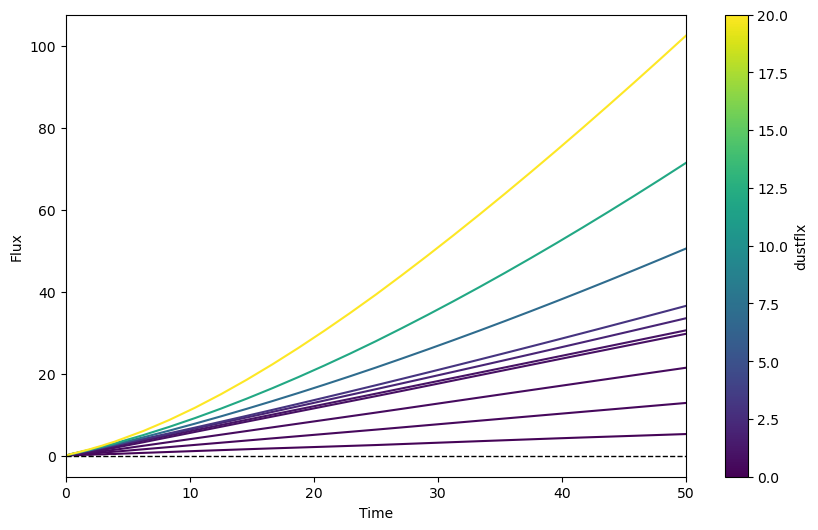

In [22]:
# --- LOW FERT PLOT
### set site
df = dflow.copy()

tsite = "site_311"

dfint = df.loc[
    (~df["ctrl"])  # ctrl == False
    & (df["set"] == ("int_" + var_fn))
    & (df["var"] == cdr_var)
    & (df["site"] == tsite)
]
dfx = df.loc[
    (~df["ctrl"])  # ctrl == False
    & (df["set"] == var_fn)
    & (df["var"] == cdr_var)
    & (df["site"] == tsite)
]

# which to plot
int_on = True
thisdf = dfint
cdvar = "cdr_dif"

# Group by 'iteration'
grouped = thisdf.groupby("dustrate_ton_ha_yr")

# set cmap
norm = Normalize(
    vmin=df["dustrate_ton_ha_yr"].min(), vmax=df["dustrate_ton_ha_yr"].max()
)
cmap = plt.get_cmap("viridis")

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group["time"], group[cdvar] * group["time"], color=cmap(norm(name)))
    else:
        plt.plot(group["time"], group[cdvar], color=cmap(norm(name)))

plt.xlim(0, 50)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
# Adding labels and legend
plt.xlabel("Time")
plt.ylabel("Flux")
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        # plt.ylim(-10,800)
    else:
        print("")
        # plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("dustflx")

# Show plot
plt.show()

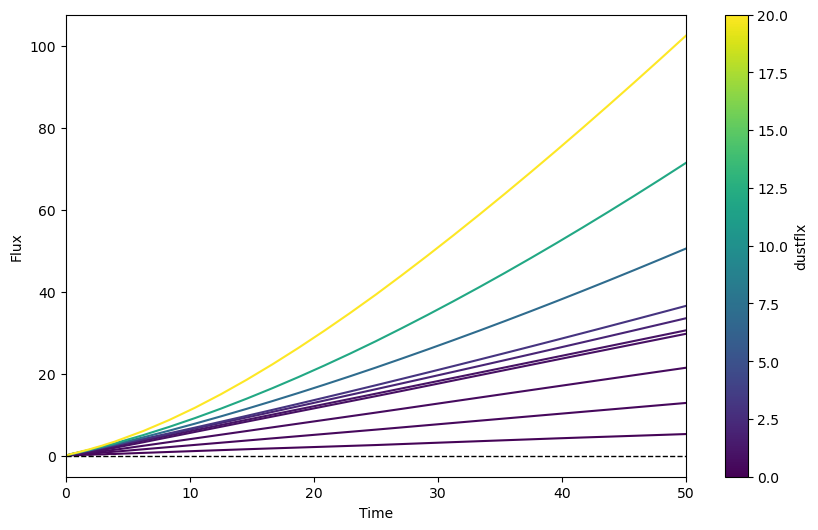

In [21]:
# --- HIGH FERT PLOT
df = dfhi.copy()
### set site
tsite = "site_311"

dfint = df.loc[
    (~df["ctrl"])  # ctrl == False
    & (df["set"] == ("int_" + var_fn))
    & (df["var"] == cdr_var)
    & (df["site"] == tsite)
]
dfx = df.loc[
    (~df["ctrl"])  # ctrl == False
    & (df["set"] == var_fn)
    & (df["var"] == cdr_var)
    & (df["site"] == tsite)
]

# which to plot
int_on = True
thisdf = dfint
cdvar = "cdr_dif"

# Group by 'iteration'
grouped = thisdf.groupby("dustrate_ton_ha_yr")

# set cmap
norm = Normalize(
    vmin=df["dustrate_ton_ha_yr"].min(), vmax=df["dustrate_ton_ha_yr"].max()
)
cmap = plt.get_cmap("viridis")

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group["time"], group[cdvar] * group["time"], color=cmap(norm(name)))
    else:
        plt.plot(group["time"], group[cdvar], color=cmap(norm(name)))

plt.xlim(0, 50)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
# Adding labels and legend
plt.xlabel("Time")
plt.ylabel("Flux")
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        # plt.ylim(-10,800)
    else:
        print("")
        # plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("dustflx")

# Show plot
plt.show()

In [16]:
# --- get anomaly
dfint_low = dflow.loc[
    (~df["ctrl"])  # ctrl == False
    & (dflow["set"] == ("int_" + var_fn))
    & (dflow["var"] == cdr_var)
    & (dflow["site"] == tsite)
]
dfint_hi = dfhi.loc[
    (~df["ctrl"])  # ctrl == False
    & (dfhi["set"] == ("int_" + var_fn))
    & (dfhi["var"] == cdr_var)
    & (dfhi["site"] == tsite)
]

dfint = dfint_hi.copy()

# which to plot
int_on = True
thisdf = dfint
cdvar = "cdr_dif"

dfint[cdvar] = dfint_low[cdvar].values - dfint_hi[cdvar].values

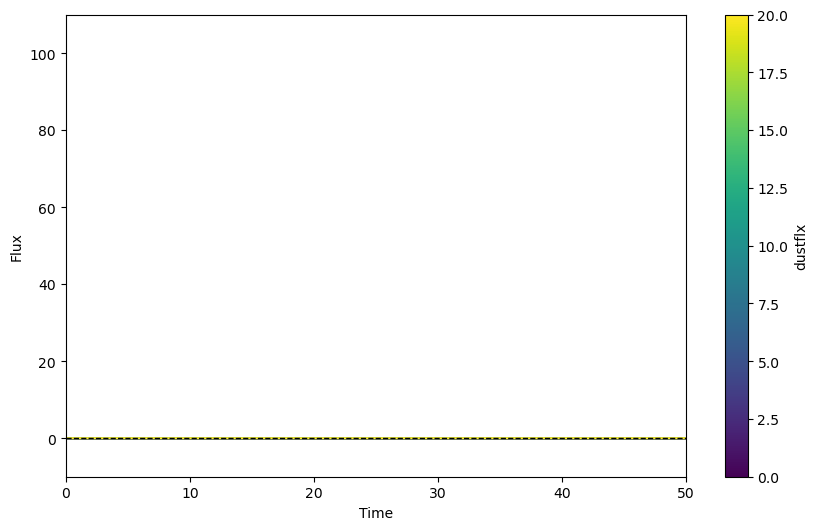

In [20]:
# --- ANOMALY
### set site
tsite = "site_311"

# Group by 'iteration'
grouped = thisdf.groupby("dustrate_ton_ha_yr")

# set cmap
norm = Normalize(
    vmin=df["dustrate_ton_ha_yr"].min(), vmax=df["dustrate_ton_ha_yr"].max()
)
cmap = plt.get_cmap("viridis")

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group["time"], group[cdvar] * group["time"], color=cmap(norm(name)))
    else:
        plt.plot(group["time"], group[cdvar], color=cmap(norm(name)))

plt.xlim(0, 50)
plt.ylim(-10, 110)
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
# Adding labels and legend
plt.xlabel("Time")
plt.ylabel("Flux")
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        # plt.ylim(-10,800)
    else:
        print("")
        # plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("dustflx")

# Show plot
plt.show()